#Basic loading and data cleaning  

In [71]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [72]:
col = ["fLength","fWidth", "fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","Class"]
df = pd.read_csv("/content/magic04.data", names=col)


In [73]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Gamma G

Hydron H

In [74]:
df["Class"].unique()

array(['g', 'h'], dtype=object)

In [75]:
df["Class"] = (df["Class"]=="g").astype(int)

In [76]:
print(df[df["Class"]==1]["fLength"].info())

<class 'pandas.core.series.Series'>
Index: 12332 entries, 0 to 12331
Series name: fLength
Non-Null Count  Dtype  
--------------  -----  
12332 non-null  float64
dtypes: float64(1)
memory usage: 192.7 KB
None


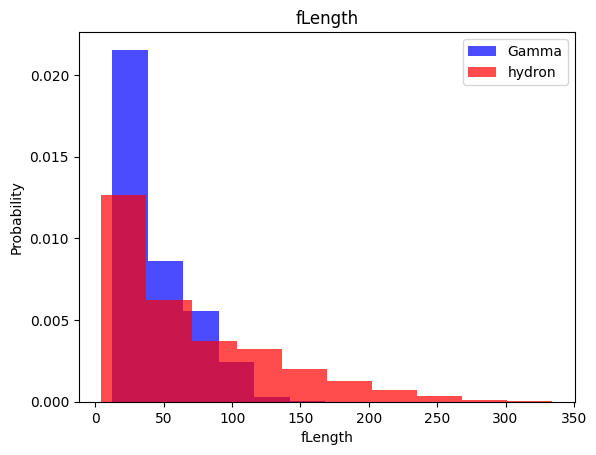

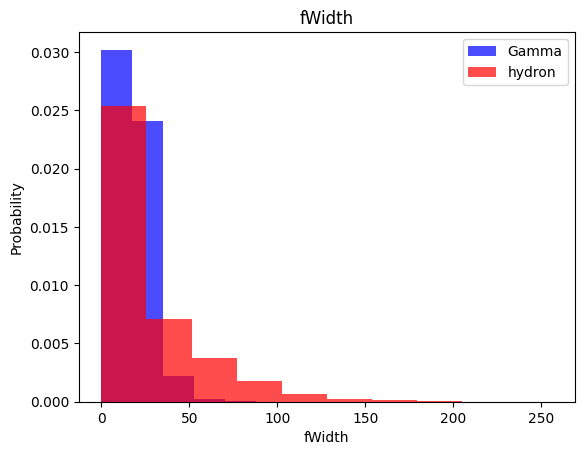

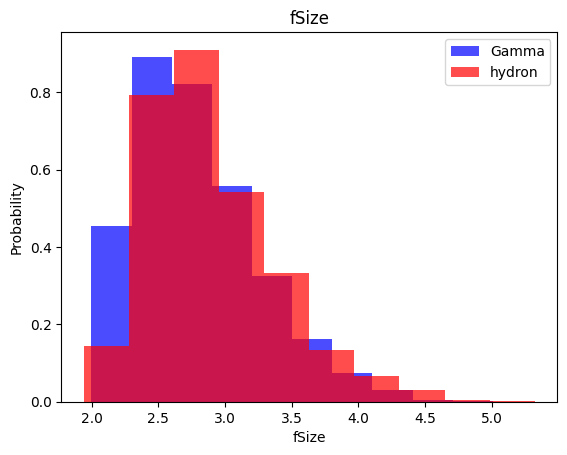

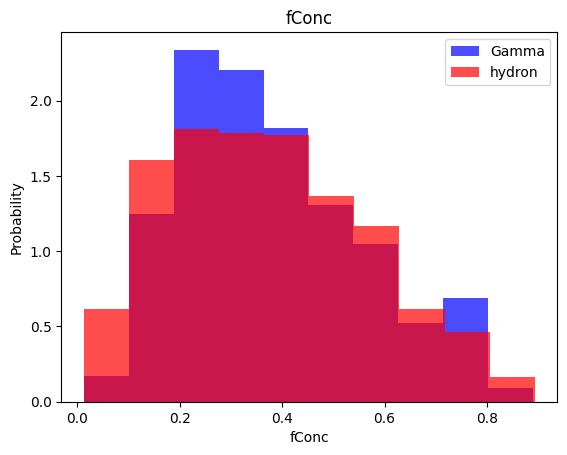

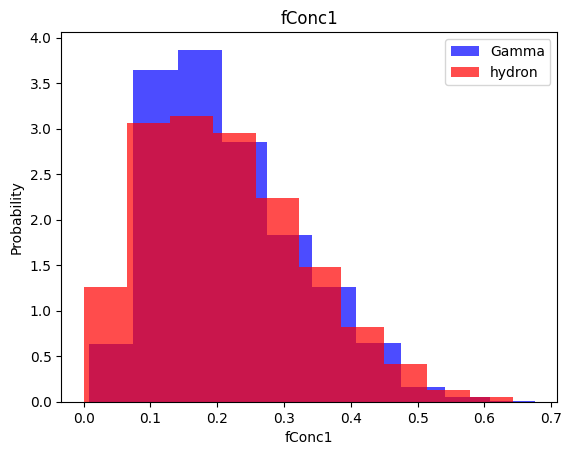

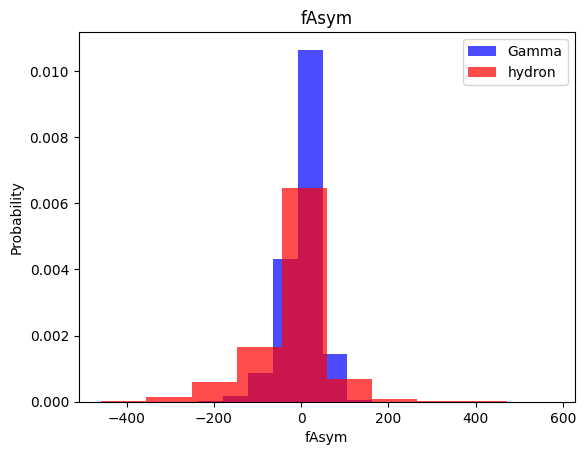

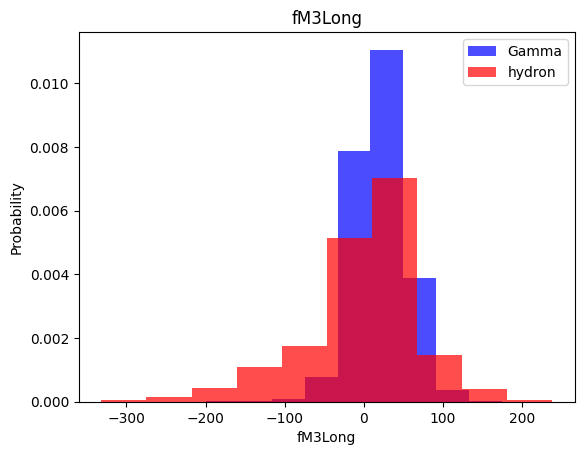

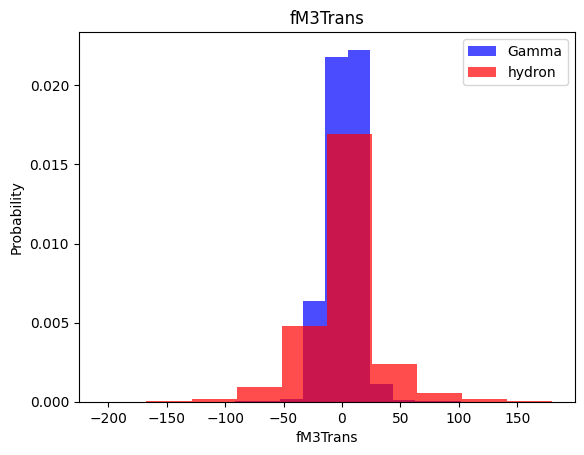

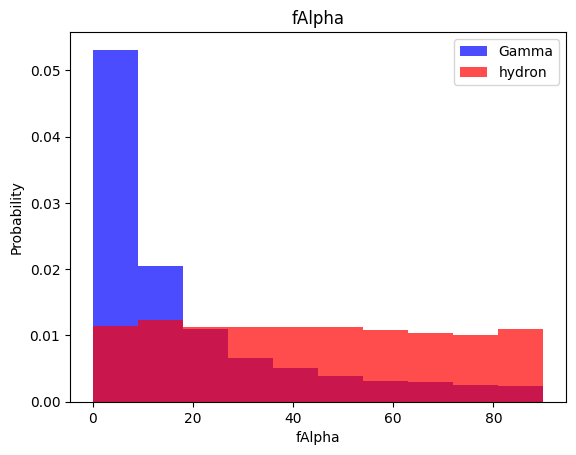

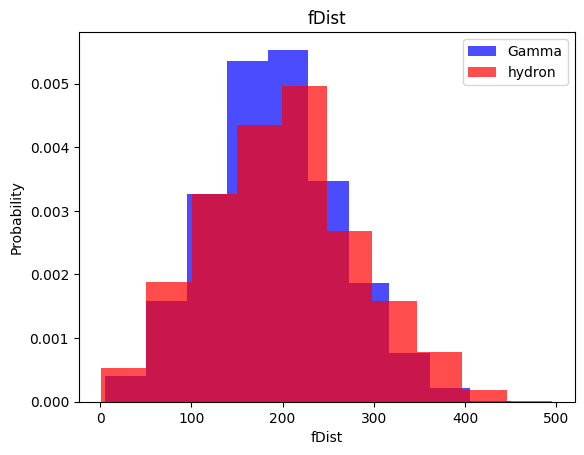

In [77]:
for label in col[:-1]:
  plt.hist(df[df["Class"]==1][label], color = 'blue', label = "Gamma", alpha=0.7, density=True)
  plt.hist(df[df["Class"]==0][label], color ='red', label="hydron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation and test dataset

In [78]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Now our data is:

60% --> Train

20% --> validation

Rest is for testing

---



In [79]:
# check weather data is uneven or not
print(len(df[df["Class"]==1]))
print(len(df[df["Class"]==0]))

12332
6688


In [80]:
# To fix uneven problem we introduce scale dataset function

def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

In [81]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [82]:
print(len(train))
print(len(valid))
print(len(test))

14954
3804
3804


In [85]:
print(len(train))
print(len(x_train[x_train==1]))
print(len(x_train[x_train==0]))

14954
0
0


In [86]:
print(len(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

14954
7477
7477


Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [91]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [92]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1394
           1       0.83      0.83      0.83      2410

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804

